# WeatherPy
----


* Observations are explained below the plots



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="http://api.openweathermap.org/data/2.5/weather?"
key=f"appid={api_key}"


In [ ]:
# city="Los Angeles"

# full_url=f"{url}q={city}&{key}&units=metric"

# response = requests.get(full_url)
# data = response.json()
# pprint(data)


# City_Name=data["name"]
# Country=data["sys"]["country"]
# Date=data["dt"]
# Lat=data["coord"]["lat"]
# Lng=data["coord"]["lon"]
# Temp=data["main"]["temp_max"]
# Humid=data["main"]["humidity"]
# Cloud=data["clouds"]["all"]
# Wind_Speed=data["wind"]["speed"]

In [4]:
# set up lists to hold reponse info
City_Name = []
Country = []
Date = []
Lat = []
Lng = []
Temp = []
Humid = []
Cloud = []
Wind_Speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    weather_response = requests.get(f"{url}&q={city}&{key}&units=imperial")
    weather_data = weather_response.json()
    try:
        City_Name.append(weather_data['name'])
        Country.append(weather_data["sys"]["country"])
        Date.append(weather_data["dt"])
        Lat.append(weather_data["coord"]["lat"])
        Lng.append(weather_data["coord"]["lon"])
        Temp.append(weather_data["main"]["temp_max"])
        Humid.append(weather_data["main"]["humidity"])
        Cloud.append(weather_data["clouds"]["all"])
        Wind_Speed.append(weather_data["wind"]["speed"])
        count += 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found. Skipping...") 
        pass
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | namibe
Processing record 2 of Set 1 | hermanus
Processing record 3 of Set 1 | punta arenas
Processing record 4 of Set 1 | bethel
Processing record 5 of Set 1 | bagotville
Processing record 6 of Set 1 | atuona
Processing record 7 of Set 1 | mar del plata
Processing record 8 of Set 1 | bambous virieux
Processing record 9 of Set 1 | vaini
Processing record 10 of Set 1 | thompson
Processing record 11 of Set 1 | ayan
Processing record 12 of Set 1 | hobart
City not found. Skipping...
Processing record 13 of Set 1 | dikson
Processing record 14 of Set 1 | nikolskoye
Processing record 15 of Set 1 | korla
Processing record 16 of Set 1 | carnarvon
Processing record 17 of Set 1 | prainha
City not found. Skipping...
Processing record 18 of Set 1 | katsuura
Processing record 19 of Set 1 | ilulissat
Processing record 20 of Set 1 | rikitea
Processing record 21 of Set 1 | ginda
Processing record 22 of Set 1 | marang
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame({
    "City":City_Name,
    "Latitude":Lat, 
    "Longitude":Lng,
    "Max Temp":Temp,
    "Humidity":Humid,
    "Cloudiness":Cloud,
    "Wind Speed":Wind_Speed,
    "Country":Country, 
    "Date":Date
})

weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mossamedes,-15.20,12.15,78.64,49,85,2.24,AO,1589083571
1,Hermanus,-34.42,19.23,57.00,81,0,5.97,ZA,1589083571
2,Punta Arenas,-53.15,-70.92,42.80,93,90,1.54,CL,1589083394
3,Bethel,41.37,-73.41,34.00,69,1,8.05,US,1589083571
4,Bagotville,-28.98,153.42,77.00,57,8,11.41,AU,1589083572


In [6]:
weather_df.to_csv("output_data/weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
mean=weather_df.mean()
mn=weather_df.min()
mx=weather_df.max()
ct=weather_df.count(0)
st=weather_df.std()
quartiles=weather_df.quantile([.25,.5,.75])

st=weather_df.drop(columns=["City", "Country"])
st_1=st.agg(['count','mean','std','min'])
st_2=st.agg(['max'])

stat_table=st_1.append(quartiles)
stat_table=stat_table.append(st_2)
stat_table

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.018748,17.054615,63.400769,68.874776,51.354204,8.211055,1.589084e+09
std,33.253397,92.459653,18.557015,22.766433,38.672549,5.870826,8.188187e+01
min,-54.800000,-175.200000,1.400000,10.000000,0.000000,0.130000,1.589083e+09
0.25,-8.030000,-65.540000,50.000000,55.000000,8.000000,3.850000,1.589084e+09
0.5,20.880000,20.740000,65.980000,74.000000,52.000000,6.930000,1.589084e+09
0.75,48.215000,102.015000,78.155000,87.000000,90.000000,10.595000,1.589084e+09
max,77.480000,179.320000,101.550000,100.000000,100.000000,51.450000,1.589084e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
bad_humid_df=weather_df.loc[weather_df["Humidity"]>100]
bad_humid_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#List of rows to remove by index
remove=list(bad_humid_df.index)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_df.drop(remove,inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mossamedes,-15.20,12.15,78.64,49,85,2.24,AO,1589083571
1,Hermanus,-34.42,19.23,57.00,81,0,5.97,ZA,1589083571
2,Punta Arenas,-53.15,-70.92,42.80,93,90,1.54,CL,1589083394
3,Bethel,41.37,-73.41,34.00,69,1,8.05,US,1589083571
4,Bagotville,-28.98,153.42,77.00,57,8,11.41,AU,1589083572


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("output_data/City_Data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is analyzing the max temperature of all cities on their latitude


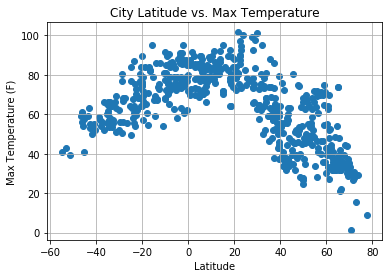

In [34]:
# Build scatter plot for latitude vs. temperature

latplot=clean_city_data["Latitude"]
tempplot=clean_city_data["Max Temp"]

plt.scatter(latplot,tempplot)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

print("This plot is analyzing the max temperature of all cities on their latitude")

plt.savefig("output_data/Temp_Plot.png")
plt.show()




## Latitude vs. Humidity Plot

This plot is analyzing the humidity percentage of all cities on their latitude


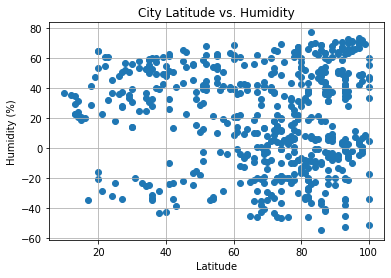

In [35]:
# Build scatter plot for latitude vs. humidity

humidplot=clean_city_data["Humidity"]

plt.scatter(humidplot,latplot)

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/Humidity_Plot.PNG")
print("This plot is analyzing the humidity percentage of all cities on their latitude")

plt.show()

## Latitude vs. Cloudiness Plot

This plot is analyzing the cloudiness percentage of all cities on their latitude


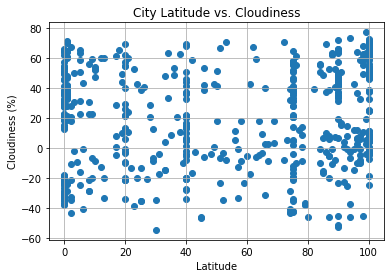

In [36]:
# Build scatter plot for latitude vs. cloudiness

cloudplot=clean_city_data["Cloudiness"]

plt.scatter(cloudplot,latplot)

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig("output_data/Cloudiness_Plot.PNG")
print("This plot is analyzing the cloudiness percentage of all cities on their latitude")

plt.show()

## Latitude vs. Wind Speed Plot

This plot is analyzing the wind speed (mph) of all cities on their latitude


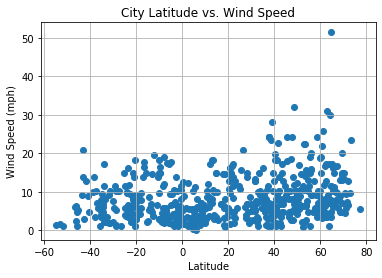

In [37]:
# Build scatter plot for latitude vs. wind speed

windplot=clean_city_data["Wind Speed"]

plt.scatter(latplot,windplot)

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()


plt.savefig("output_data/Wind_Speed_Plot.PNG")
print("This plot is analyzing the wind speed (mph) of all cities on their latitude")

plt.show()

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, eq_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,eq_loc,fontsize=15,color="red")
    plt.title(f"Latitude vs. {y_label}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"The correlation between latitude and {y_label} is: {rvalue}")


In [39]:
# Create Northern and Southern Hemisphere DataFrames
North_Hemp=clean_city_data.loc[clean_city_data["Latitude"] >= 0]
South_Hemp=clean_city_data.loc[clean_city_data["Latitude"] < 0,:]

North_Hemp

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Bethel,41.37,-73.41,34.00,69,1,8.05,US,1589083571
9,Thompson,55.74,-97.86,28.40,63,75,14.99,CA,1589083573
10,Ayan,56.45,138.17,41.07,66,8,9.17,RU,1589083573
12,Dikson,73.51,80.55,29.17,97,94,23.44,RU,1589083574
13,Nikolskoye,59.70,30.79,42.80,60,63,4.47,RU,1589083574
...,...,...,...,...,...,...,...,...,...
553,Tambura,5.60,27.47,71.02,77,99,3.69,SS,1589083768
554,Krasnoarmeysk,51.02,45.70,50.00,85,5,5.99,RU,1589083769
555,Dhidhdhoo,6.88,73.10,83.71,76,100,5.75,MV,1589083770
556,Berdigestyakh,62.10,126.70,44.56,52,0,3.36,RU,1589083770


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and Max Temp is: -0.7917209374012195
r value of -0.8 indicates a strong negative correlation between latitude and max temperature in Northern Hemisphere. As latitude increases, max temperature decrases


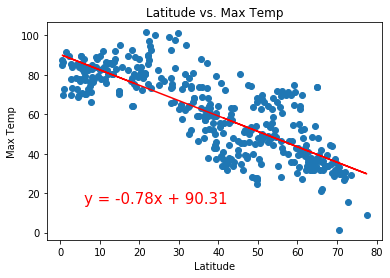

In [40]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,15))

plt.savefig("output_data/North_Hemisphere_Temp_Plot.PNG")
print("r value of -0.8 indicates a strong negative correlation between latitude and max temperature in Northern Hemisphere. As latitude increases, max temperature decrases")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and Max Temp is: 0.7190725654472538
r value of 0.72 indicates a strong positive correlation between latitude and max temperature in Southern Hemisphere.
As latitude increases, max temperature increases


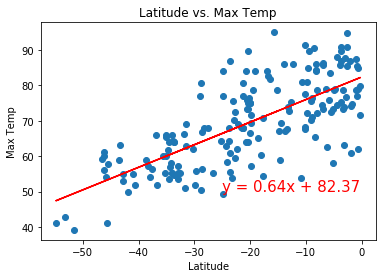

In [26]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-25,50))

plt.savefig("output_data/South_Hemisphere_Temp_Plot.PNG")
print("r value of 0.72 indicates a strong positive correlation between latitude and max temperature in Southern Hemisphere.") 
print("As latitude increases, max temperature increases")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and Humidity (%) is: -0.0032905931679346728
r value of 0.003 indicates very weak to no correlation between latitude and humidity in Northern Hemisphere.


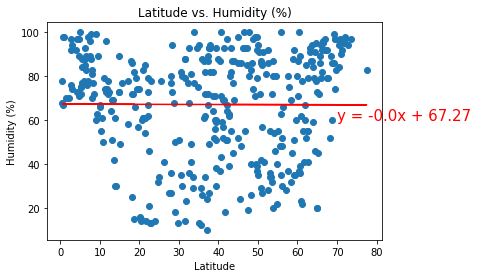

In [41]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(70,60))

plt.savefig("output_data/North_Hemisphere_Humidity_Plot.PNG")
print("r value of 0.003 indicates very weak to no correlation between latitude and humidity in Northern Hemisphere.")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and Humidity (%) is: 0.20822341398225128
r value 0.21 of indicates a weak or no correlation between latitude and humidity in Southern Hemisphere.


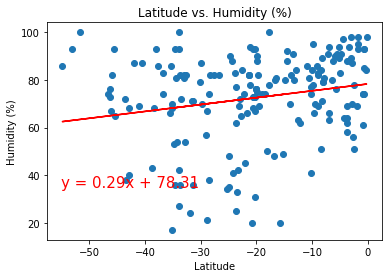

In [44]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(-55,35))

plt.savefig("output_data/South_Hemisphere_Humid_Plot.PNG")
print(f"r value 0.21 of indicates a weak or no correlation between latitude and humidity in Southern Hemisphere.") 

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and Cloudiness (%) is: 0.02377622051342027
r value of 0.024 indicates very weak to no correlation between latitude and cloudiness in Northern Hemisphere.


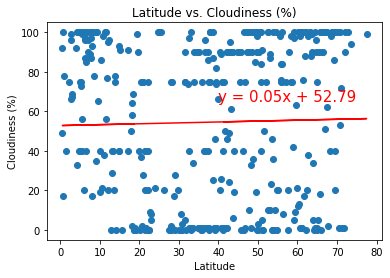

In [46]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(40,65))

plt.savefig("output_data/North_Hemisphere_Cloudiness_Plot.PNG")
print("r value of 0.024 indicates very weak to no correlation between latitude and cloudiness in Northern Hemisphere.")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and Cloudiness (%) is: 0.225236237666489
r value of 0.225 indicates a weak or no correlation between latitude and cloudiness in Southern Hemisphere.


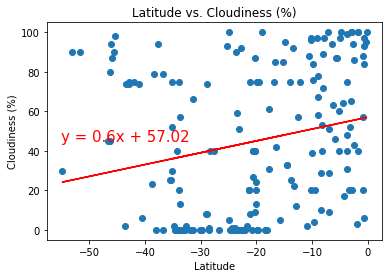

In [48]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(-55,45))

plt.savefig("output_data/South_Hemisphere_Cloudiness_Plot.PNG")
print("r value of 0.225 indicates a weak or no correlation between latitude and cloudiness in Southern Hemisphere.") 

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and Wind Speed (mph) is: 0.28180181480790567
r value of 0.281 indicates very weak to no correlation between latitude and wind speed in Northern Hemisphere.


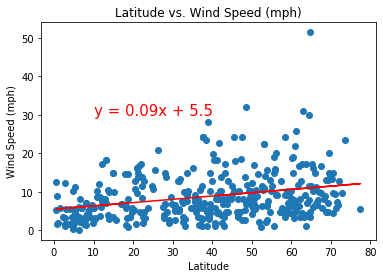

In [50]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(10,30))

plt.savefig("output_data/North_Hemisphere_Wind_Speed_Plot.PNG")
print("r value of 0.281 indicates very weak to no correlation between latitude and wind speed in Northern Hemisphere.")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and Wind Speed (mph) is: 0.04855857611110942
r value of 0.049 indicates a weak or no correlation between latitude and wind speed in Southern Hemisphere.


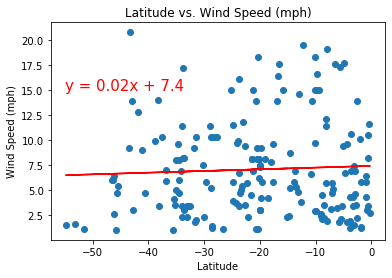

In [52]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(-55,15))

plt.savefig("output_data/South_Hemisphere_Wind_Speed_Plot.PNG")
print("r value of 0.049 indicates a weak or no correlation between latitude and wind speed in Southern Hemisphere.") 

plt.show()